In [311]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [312]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
submit = pd.read_csv("/content/sample_submission.csv")
weather = pd.read_csv("/content/weather.csv")
holiday = pd.read_csv("/content/holidays.csv")

In [313]:
submit


,unique_id,bildirimsiz_sum
0,2024-01-04-manisa-akhisar,NaN
1,2024-01-04-manisa-alasehir,NaN
2,2024-01-04-manisa-demirci,NaN
3,2024-01-04-manisa-golmarmara,NaN
4,2024-01-04-manisa-gordes,NaN
...,...,...
1311,2024-01-31-izmir-balcova,NaN
1312,2024-01-31-izmir-beydag,NaN
1313,2024-01-31-izmir-narlidere,NaN
1314,2024-01-31-manisa-ahmetli,NaN


In [314]:
train

,tarih,ilce,bildirimsiz_sum,bildirimli_sum
0,2021-01-01,manisa-akhisar,9,0
1,2021-01-02,manisa-akhisar,10,0
2,2021-01-03,manisa-akhisar,5,2
3,2021-01-04,manisa-akhisar,6,0
4,2021-01-05,manisa-akhisar,15,4
...,...,...,...,...
46939,2023-12-28,izmir-selcuk,1,0
46940,2023-12-29,izmir-selcuk,1,1
46941,2023-12-30,izmir-selcuk,0,2
46942,2023-12-31,izmir-selcuk,1,0


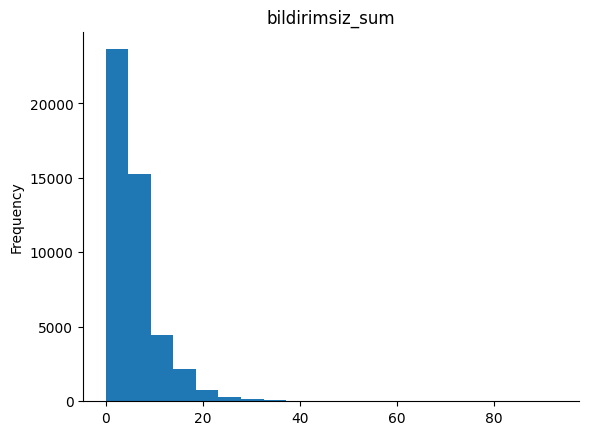

In [315]:
train['bildirimsiz_sum'].plot(kind='hist', bins=20, title='bildirimsiz_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [316]:
test

,tarih,ilce,bildirimli_sum
0,2024-01-04,manisa-akhisar,0
1,2024-01-04,manisa-alasehir,1
2,2024-01-04,manisa-demirci,0
3,2024-01-04,manisa-golmarmara,0
4,2024-01-04,manisa-gordes,0
...,...,...,...
1311,2024-01-31,izmir-balcova,0
1312,2024-01-31,izmir-beydag,0
1313,2024-01-31,izmir-narlidere,0
1314,2024-01-31,manisa-ahmetli,0


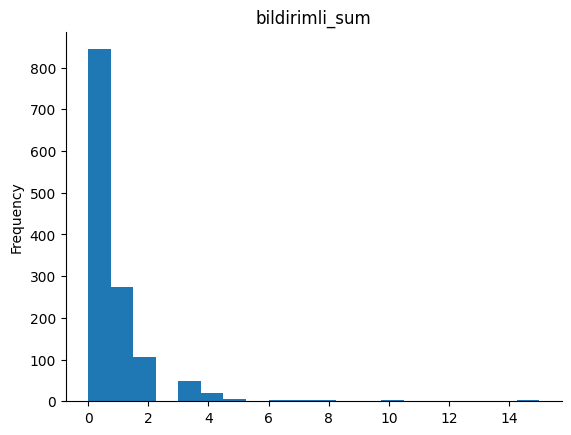

In [317]:
test['bildirimli_sum'].plot(kind='hist', bins=20, title='bildirimli_sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [318]:
weather

,date,lat,lon,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,ilce
0,2021-01-01 00:00:00,38.7996,26.9707,13.8,40.2,0.0,80.0,168.3,6.0,1.0,13.4,izmir-aliaga
1,2021-01-01 01:00:00,38.7996,26.9707,13.5,56.8,0.0,83.0,173.3,5.9,1.0,13.1,izmir-aliaga
2,2021-01-01 02:00:00,38.7996,26.9707,13.3,71.6,0.0,83.9,176.7,5.2,1.0,13.1,izmir-aliaga
3,2021-01-01 03:00:00,38.7996,26.9707,12.9,69.8,0.0,88.3,183.1,5.6,1.0,12.8,izmir-aliaga
4,2021-01-01 04:00:00,38.7996,26.9707,12.6,56.3,0.0,90.0,166.9,6.4,1.0,12.4,izmir-aliaga
...,...,...,...,...,...,...,...,...,...,...,...,...
539633,2021-12-16 17:00:00,38.2302,28.2064,7.5,98.2,55.2,60.9,8.3,0.9,1.0,8.1,izmir-kiraz
539634,2021-12-16 18:00:00,38.2302,28.2064,6.2,95.2,0.0,71.6,338.7,0.6,1.0,6.2,izmir-kiraz
539635,2021-12-16 19:00:00,38.2302,28.2064,5.5,85.2,0.0,73.3,358.2,0.4,1.0,5.5,izmir-kiraz
539636,2021-12-16 20:00:00,38.2302,28.2064,5.2,89.3,0.0,76.6,20.2,0.6,1.0,5.2,izmir-kiraz


In [319]:
holiday

,Yıl,Ay,Gün,Bayram_Flag
0,2021,1,1,Yılbaşı
1,2021,4,23,Ulusal Egemenlik ve Çocuk Bayramı
2,2021,5,1,Emek ve Dayanışma Günü
3,2021,5,19,"Atatürk'ü Anma, Gençlik ve Spor Bayramı"
4,2021,7,15,Demokrasi ve Millî Birlik Günü
5,2021,8,30,Zafer Bayramı
6,2021,10,29,Cumhuriyet Bayramı
7,2021,5,13,Ramazan Bayramı
8,2021,5,14,Ramazan Bayramı
9,2021,5,15,Ramazan Bayramı


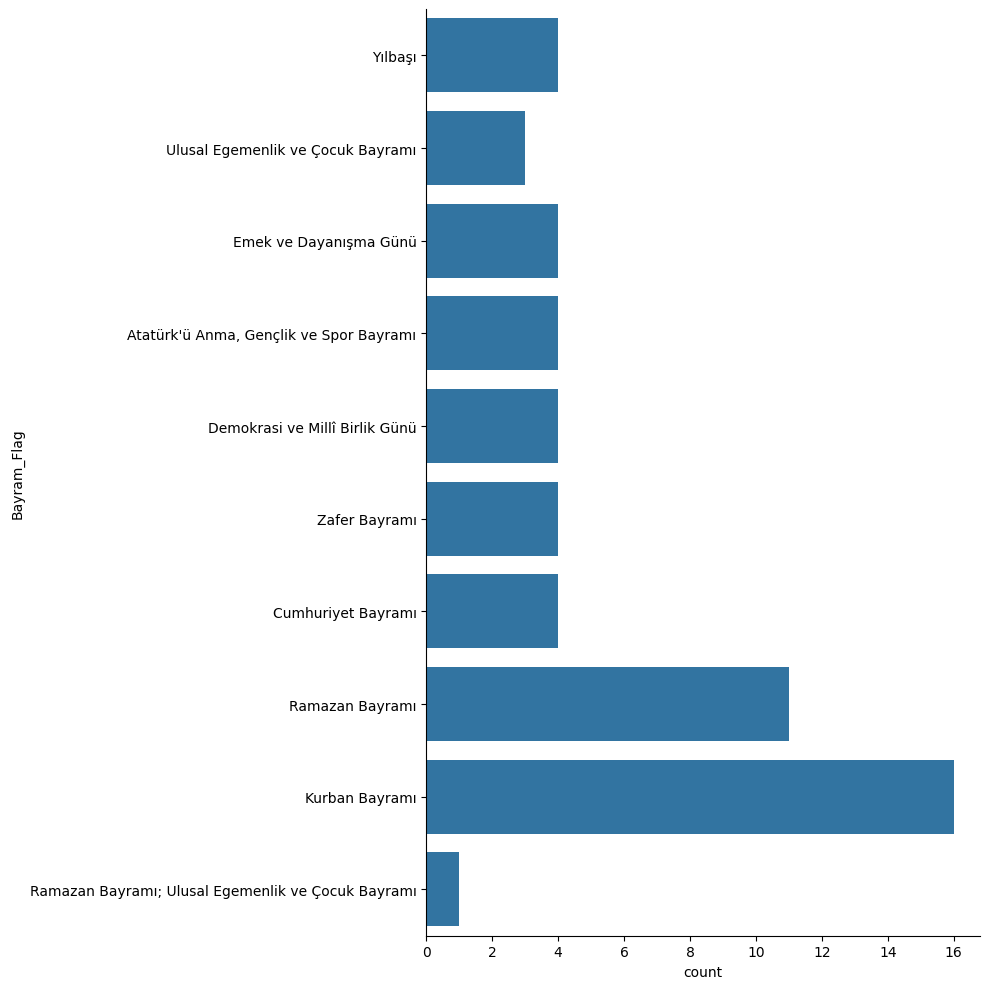

In [320]:
sns.catplot(data= holiday, y= "Bayram_Flag", kind= "count", height=10)

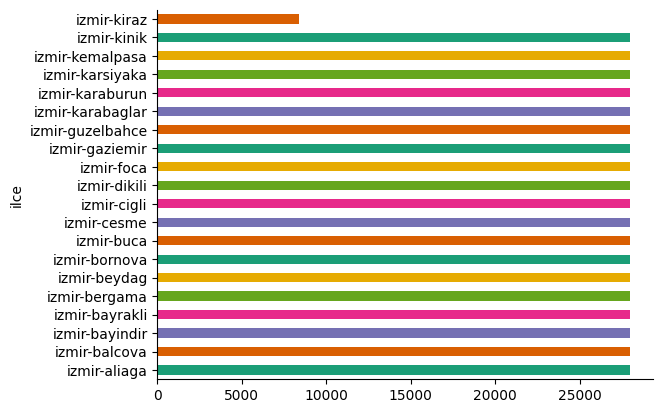

In [321]:
weather.groupby('ilce').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='effective_cloud_cover:p', ylabel='ilce'>

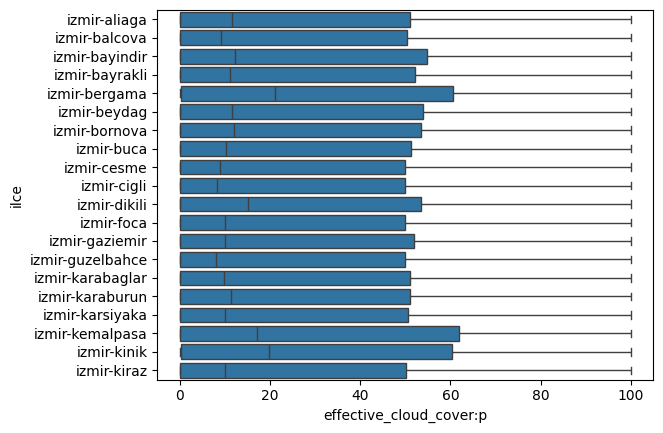

In [322]:
sns.boxplot(x= "effective_cloud_cover:p", y= "ilce", data= weather)


<Axes: xlabel='lat', ylabel='prob_precip_1h:p'>

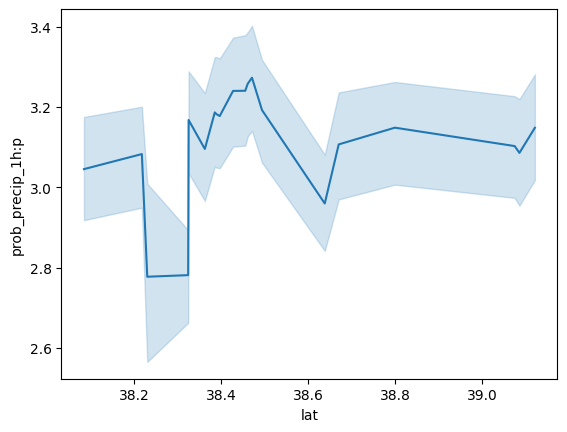

In [323]:
sns.lineplot(weather, y= "prob_precip_1h:p" , x= "lat")

In [324]:
train2 = train[["tarih","ilce","bildirimsiz_sum"]]

In [325]:
train2

,tarih,ilce,bildirimsiz_sum
0,2021-01-01,manisa-akhisar,9
1,2021-01-02,manisa-akhisar,10
2,2021-01-03,manisa-akhisar,5
3,2021-01-04,manisa-akhisar,6
4,2021-01-05,manisa-akhisar,15
...,...,...,...
46939,2023-12-28,izmir-selcuk,1
46940,2023-12-29,izmir-selcuk,1
46941,2023-12-30,izmir-selcuk,0
46942,2023-12-31,izmir-selcuk,1


In [326]:
train2_np= train2.to_numpy()

In [327]:
X_train, y_train= train2_np[:,:-1], train2_np[:,-1]


In [328]:
y_train

array([9, 10, 5, ..., 0, 1, 3], dtype=object)

In [329]:
y_train.shape

(46944,)

In [330]:
from sklearn.metrics import mean_absolute_error

y_pred = [1, 2, 3, 4, 5]
y_true = [2, 3, 4, 5, 6]

mae = mean_absolute_error(y_true, y_pred)

print(f"Mean absolute error: {mae}")


Mean absolute error: 1.0


In [331]:
test_np = test.to_numpy()

X_test, y_test= test_np[:,:-1],  test_np[:,-1]


In [332]:
X_test

array([['2024-01-04', 'manisa-akhisar'],
       ['2024-01-04', 'manisa-alasehir'],
       ['2024-01-04', 'manisa-demirci'],
       ...,
       ['2024-01-31', 'izmir-narlidere'],
       ['2024-01-31', 'manisa-ahmetli'],
       ['2024-01-31', 'izmir-selcuk']], dtype=object)

In [333]:
y_test

array([0, 1, 0, ..., 0, 0, 2], dtype=object)

In [334]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [335]:
import pandas as pd

# Convert strings to datetime objects
X_train_datetime = pd.to_datetime(X_train[:, 0])

# Extract year, month, and day values
X_train_numeric = np.column_stack((X_train_datetime.year, X_train_datetime.month, X_train_datetime.day))

# Train the linear regression model
linear_model = LinearRegression().fit(X_train_numeric, y_train)

# Make predictions and evaluate the model
linear_train_pred = linear_model.predict(X_train_numeric)
mean_absolute_error(linear_train_pred, y_train)

3.770306102602466

In [336]:
X_test_datetime = pd.to_datetime(X_test[:, 0])

# Extract year, month, and day values
X_test_numeric = np.column_stack((X_test_datetime.year, X_test_datetime.month, X_test_datetime.day))

# Train the linear regression model
linear_model = LinearRegression().fit(X_test_numeric, y_test)

# Make predictions and evaluate the model
linear_test_pred = linear_model.predict(X_test_numeric)
mean_absolute_error(linear_test_pred, y_test)

0.8643077436716089

In [337]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=10, max_depth=4).fit(X_train_numeric, y_train)
rf_train_pred= rf.predict(X_train_numeric)
rf_test_pred= rf.predict(X_test_numeric)
mean_absolute_error(rf_train_pred, y_train), mean_absolute_error(rf_test_pred, y_test)

(3.688919620902307, 4.535645064498017)

In [338]:
rf_test_pred.size

1316

In [339]:
import pandas
def merge_columns(file, column1, column2):
    df = pandas.read_csv(file, dtype={column2: object}, keep_default_na=False)
    df[column1] = df[column1] + "" + df[column2]
    del df[column2]
    df.to_csv(file, index=False)

In [340]:
def merge_columns(file, column1, column2):
    df = pandas.read_csv(file, dtype={column2: object}, keep_default_na=False)

    try:
        df[column1] = df[column1] + "" + df[column2]
        del df[column2]
    except KeyError as e:
        print(f"Column '{e.args[0]}' does not exist in the '{file}' file.")

    df.to_csv(file, index=False)

In [341]:
test2= merge_columns(file="test.csv",column1="tarih",column2="ilce")

In [342]:
test["ilce"].to_string

<bound method Series.to_string of 0          manisa-akhisar
1         manisa-alasehir
2          manisa-demirci
3       manisa-golmarmara
4           manisa-gordes
              ...        
1311        izmir-balcova
1312         izmir-beydag
1313      izmir-narlidere
1314       manisa-ahmetli
1315         izmir-selcuk
Name: ilce, Length: 1316, dtype: object>

In [343]:
test["unique_id"]= test["tarih"] + "-" + test["ilce"]
test

,tarih,ilce,bildirimli_sum,unique_id
0,2024-01-04,manisa-akhisar,0,2024-01-04-manisa-akhisar
1,2024-01-04,manisa-alasehir,1,2024-01-04-manisa-alasehir
2,2024-01-04,manisa-demirci,0,2024-01-04-manisa-demirci
3,2024-01-04,manisa-golmarmara,0,2024-01-04-manisa-golmarmara
4,2024-01-04,manisa-gordes,0,2024-01-04-manisa-gordes
...,...,...,...,...
1311,2024-01-31,izmir-balcova,0,2024-01-31-izmir-balcova
1312,2024-01-31,izmir-beydag,0,2024-01-31-izmir-beydag
1313,2024-01-31,izmir-narlidere,0,2024-01-31-izmir-narlidere
1314,2024-01-31,manisa-ahmetli,0,2024-01-31-manisa-ahmetli


In [344]:
test2=test.drop(["tarih"], axis=1)
test3=test2.drop(["ilce"], axis=1)
test3

,bildirimli_sum,unique_id
0,0,2024-01-04-manisa-akhisar
1,1,2024-01-04-manisa-alasehir
2,0,2024-01-04-manisa-demirci
3,0,2024-01-04-manisa-golmarmara
4,0,2024-01-04-manisa-gordes
...,...,...
1311,0,2024-01-31-izmir-balcova
1312,0,2024-01-31-izmir-beydag
1313,0,2024-01-31-izmir-narlidere
1314,0,2024-01-31-manisa-ahmetli


In [345]:
test4=test3.reindex(columns=["unique_id","bildirimli_sum"])
test4

,unique_id,bildirimli_sum
0,2024-01-04-manisa-akhisar,0
1,2024-01-04-manisa-alasehir,1
2,2024-01-04-manisa-demirci,0
3,2024-01-04-manisa-golmarmara,0
4,2024-01-04-manisa-gordes,0
...,...,...
1311,2024-01-31-izmir-balcova,0
1312,2024-01-31-izmir-beydag,0
1313,2024-01-31-izmir-narlidere,0
1314,2024-01-31-manisa-ahmetli,0


In [346]:
test4["bildirimsiz_sum"]= rf_test_pred
test4

,unique_id,bildirimli_sum,bildirimsiz_sum
0,2024-01-04-manisa-akhisar,0,5.109401
1,2024-01-04-manisa-alasehir,1,5.109401
2,2024-01-04-manisa-demirci,0,5.109401
3,2024-01-04-manisa-golmarmara,0,5.109401
4,2024-01-04-manisa-gordes,0,5.109401
...,...,...,...
1311,2024-01-31-izmir-balcova,0,5.109401
1312,2024-01-31-izmir-beydag,0,5.109401
1313,2024-01-31-izmir-narlidere,0,5.109401
1314,2024-01-31-manisa-ahmetli,0,5.109401


In [347]:
submission= test4.drop(["bildirimli_sum"], axis=1)
submission

,unique_id,bildirimsiz_sum
0,2024-01-04-manisa-akhisar,5.109401
1,2024-01-04-manisa-alasehir,5.109401
2,2024-01-04-manisa-demirci,5.109401
3,2024-01-04-manisa-golmarmara,5.109401
4,2024-01-04-manisa-gordes,5.109401
...,...,...
1311,2024-01-31-izmir-balcova,5.109401
1312,2024-01-31-izmir-beydag,5.109401
1313,2024-01-31-izmir-narlidere,5.109401
1314,2024-01-31-manisa-ahmetli,5.109401


In [348]:
submission.to_csv("submission2.csv", index= False)